In [ ]:
#Loading and preparing the Raw data

In [1]:
#save Ram from exploding
#Begone memory
def memory():
    def Begone_memory(exceptions=None):
        if exceptions is None:
            exceptions = []

        for var in list(globals().keys()):
            if var not in exceptions:
                del globals()[var]
    Begone_memory()
    def Begone_memory(exceptions=None):
        if exceptions is None:
            exceptions = []

        for var in list(globals().keys()):
            if var not in exceptions:
                del globals()[var]
memory()
import tifffile
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the raw data
datafile_2nd_with_light = r"A:\3rd_Year_Project\Project_code\data\Raw_Data\secondwithlight_MMStack_Default.ome.tif"
datafile_15_percent = f'A:/3rd_Year_Project/Project_code/data/Raw_Data/15percent_MMStack_Default.ome-001.tif'

#load the 15% raw data
# Use memmap to load the TIFF file lazily
with tifffile.TiffFile(datafile_15_percent) as tif:
    # Map the image data to memory instead of loading it entirely into memory
    data = tif.asarray()

#data = io.imread(datafile)
data_15 = data[:, 1, :, :]  # Assuming you want to skip the first index (0) and keep the rest

print(f"Datafile contents: {datafile_15_percent}")
print(f"Data shape: {data_15.shape}")  # Print the shape to understand the data structure

#load the 2nd light data
# Use memmap to load the TIFF file lazily
with tifffile.TiffFile(datafile_2nd_with_light) as tif:
    # Map the image data to memory instead of loading it entirely into memory
    data = tif.asarray()

#data = io.imread(datafile)
data_2nd = data[:, 0, :, :]  # Assuming you want to skip the first index (0) and keep the rest

print(f"Datafile contents: {datafile_2nd_with_light}")
print(f"Data shape: {data_2nd.shape}")  # Print the shape to understand the data structure

Datafile contents: A:/3rd_Year_Project/Project_code/data/Raw_Data/15percent_MMStack_Default.ome-001.tif
Data shape: (600, 1200, 1200)
Datafile contents: A:\3rd_Year_Project\Project_code\data\Raw_Data\secondwithlight_MMStack_Default.ome.tif
Data shape: (300, 1200, 1200)


In [3]:
#save as np
np.save("A:/3rd_Year_Project/Project_code/data/Loaded_Raw_Data/15_percent/saved_15_percent.npy", data_15)
np.save("A:/3rd_Year_Project/Project_code/data/Loaded_Raw_Data/2nd_light/saved_2ndlight.npy", data_2nd)

print("Saved data as .npy files.")

Saved data as .npy files.


In [4]:
data = np.load("A:/3rd_Year_Project/Project_code/data/Loaded_Raw_Data/15_percent/saved_15_percent.npy")
print("15%", np.shape(data))
data = np.load("A:/3rd_Year_Project/Project_code/data/Loaded_Raw_Data/2nd_light/saved_2ndlight.npy")
print("2nd", np.shape(data))

15% (600, 1200, 1200)
2nd (300, 1200, 1200)


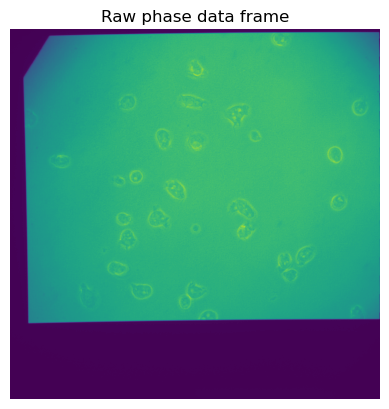

In [7]:
fig, ax = plt.subplots()
plt.imshow(data_2nd[200])#, cmap='gray_r')
plt.title("Raw phase data frame")
ax.axis("off")
plt.show()